In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('mode.chained_assignment', None) #To ignore SettingWithCopyWarning

In [ ]:
#read dataset
df = pd.read_csv("dataset.csv")
df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


# Feature Selction using Filter Method

In [ ]:
#remove rows with null values on any columns
df = df.dropna(axis = 0, how ='any') 

In [ ]:
#check again to make sure there are no null values
df.isnull().sum()

Music                       0
Slow songs or fast songs    0
Dance                       0
Folk                        0
Country                     0
                           ..
Left - right handed         0
Education                   0
Only child                  0
Village - town              0
House - block of flats      0
Length: 150, dtype: int64

In [ ]:
#convert the 'Loneliness' answers to Yes or No only for binary classification (originally in 5-point likert scale)
map_dict = {1.0: "No",2.0: "No",3.0: "No",4.0: "Yes",5.0: "Yes"}
df['Loneliness'] = df['Loneliness'].map(map_dict)

In [ ]:
#arranging the dataset by categories
music_preferences = df.iloc[:, :19]
movie_preferences = df.iloc[:, 19:31]
hobbiesAnd_interests = df.iloc[:, 31:63]
phobias = df.iloc[:, 63:73]
health_habits = df.iloc[:, 73:76]
traits_views_opinions = df.iloc[:, 76:133]
spending_habits = df.iloc[:, 133:140]
demographics = df.iloc[:, 140:150]
demographics

,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
4,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
5,20.0,186.0,77.0,1.0,male,right handed,secondary school,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...
1004,22.0,175.0,60.0,1.0,male,right handed,secondary school,no,city,block of flats
1005,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1007,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


In [ ]:
#remove unwanted columns from dataset because we don't need them
df.drop(music_preferences, inplace=True, axis=1)
df.drop(movie_preferences, inplace=True, axis=1)
df.drop(phobias, inplace=True, axis=1)

In [ ]:
#we also don't need this so we can remove them
df.drop('Age', inplace=True, axis=1)
df.drop('Height', inplace=True, axis=1)
df.drop('Weight', inplace=True, axis=1)
df.drop('Number of siblings', inplace=True, axis=1)

In [ ]:
df

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,3.0,3.0,1,3.0,female,right handed,college/bachelor degree,no,village,block of flats
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,4.0,2.0,5,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,4.0,3.0,4,2.0,female,right handed,secondary school,no,city,block of flats
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,3.0,2,4.0,female,right handed,secondary school,no,village,house/bungalow
5,5.0,3.0,4.0,2.0,3.0,4.0,4.0,1.0,4.0,4.0,...,3.0,1.0,4,4.0,male,right handed,secondary school,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,3.0,4.0,1.0,2.0,2.0,5.0,5.0,3.0,3.0,2.0,...,4.0,4.0,4,2.0,male,right handed,secondary school,no,city,block of flats
1005,4.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,...,3.0,4.0,3,4.0,female,right handed,secondary school,no,city,house/bungalow
1007,2.0,3.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,...,2.0,2.0,2,5.0,female,right handed,secondary school,yes,city,block of flats
1008,3.0,5.0,3.0,1.0,1.0,5.0,4.0,3.0,3.0,3.0,...,5.0,3.0,3,3.0,female,right handed,college/bachelor degree,no,city,block of flats


In [ ]:
#Convert the columns with categories into labels
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
columns = ['Gender','Left - right handed','Education','Only child','Village - town','House - block of flats','Internet usage', 'Alcohol','Smoking','Lying','Punctuality','Loneliness']


In [ ]:
enc.fit(df[columns])
df[columns] = enc.transform(df[columns])

In [ ]:
df

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,3.0,3.0,1,3.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,4.0,2.0,5,2.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,4.0,3.0,4,2.0,0.0,1.0,5.0,0.0,0.0,0.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,3.0,2,4.0,0.0,1.0,5.0,0.0,1.0,1.0
5,5.0,3.0,4.0,2.0,3.0,4.0,4.0,1.0,4.0,4.0,...,3.0,1.0,4,4.0,1.0,1.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,3.0,4.0,1.0,2.0,2.0,5.0,5.0,3.0,3.0,2.0,...,4.0,4.0,4,2.0,1.0,1.0,5.0,0.0,0.0,0.0
1005,4.0,4.0,2.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,...,3.0,4.0,3,4.0,0.0,1.0,5.0,0.0,0.0,1.0
1007,2.0,3.0,3.0,3.0,1.0,3.0,4.0,1.0,1.0,1.0,...,2.0,2.0,2,5.0,0.0,1.0,5.0,1.0,0.0,0.0
1008,3.0,5.0,3.0,1.0,1.0,5.0,4.0,3.0,3.0,3.0,...,5.0,3.0,3,3.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#separate the features and target variable
x = df.drop(columns=['Loneliness'],axis=1)
y = df['Loneliness']                #loneliness is the target variable

In [ ]:
#Use chi square to determine correlation of each feature to the target variable
from sklearn.feature_selection import chi2
chi_scores = chi2(x,y)
chi_scores

(array([4.08393675e-01, 1.31371000e-01, 2.19705239e+00, 8.73978442e-05,
        1.55834846e-02, 8.07720625e-01, 9.14698578e-01, 4.05419833e+00,
        4.43880340e-01, 4.42013977e-01, 3.54826204e+00, 1.40462615e+00,
        1.04857607e-01, 8.13514107e-02, 4.55645560e+00, 6.40717039e+00,
        2.97073371e-01, 6.09307990e-02, 4.92964976e-01, 6.71960141e-01,
        5.67373442e-01, 1.50162076e+01, 3.79860885e-01, 4.88683128e+00,
        1.41697628e-03, 3.35874786e-02, 5.55922806e-01, 2.56755816e-01,
        2.45759559e-01, 1.63505874e+00, 1.84379936e+00, 2.33636656e-01,
        7.72125276e-02, 1.73855102e-01, 1.57960858e-02, 1.46996581e-03,
        1.78515384e+00, 4.22887762e-01, 3.09930948e-01, 1.08658901e+00,
        1.06120422e+00, 6.50036432e-02, 2.56196417e-02, 1.15955971e+00,
        3.52626952e-01, 1.83179849e-01, 1.45641407e+01, 4.98544978e+00,
        8.09322787e-01, 6.26002415e+00, 9.89425882e+00, 6.37738443e-04,
        7.62510692e+00, 4.73265809e-02, 8.94860663e+00, 5.641237

In [ ]:
#p values less than 0.05 is significant so meaning we can use them for the model
p_values = pd.Series(chi_scores[1], index = x.columns)
p_values.sort_values(ascending=False)

Achievements         9.949729e-01
Mathematics          9.925409e-01
Judgment calls       9.798528e-01
Gardening            9.699725e-01
Daily events         9.694165e-01
                         ...     
Mood swings          1.881181e-05
Happiness in life    1.346800e-05
Energy levels        1.299480e-05
Changing the past    8.582389e-07
Number of friends    5.623436e-07
Length: 104, dtype: float64

In [ ]:
#See the features with their corresponding p-values
pValues = []

features = list(p_values[p_values<=0.05].index)

for i in p_values:
    if i < 0.05:
        pValues.append(i)

final_features = pd.Series(pValues, index=features)
final_features

Economy Management        4.406164e-02
Law                       3.279488e-02
Cars                      1.136604e-02
Writing                   1.065918e-04
Active sport              2.706231e-02
Fake                      1.354681e-04
Criminal damage           2.556134e-02
Elections                 1.234925e-02
Self-criticism            1.657952e-03
Hypochondria              5.756126e-03
Eating to survive         2.776813e-03
Changing the past         8.582389e-07
Number of friends         5.623436e-07
Mood swings               1.881181e-05
Socializing               2.383559e-02
Getting angry             8.656130e-03
Unpopularity              2.087093e-02
Life struggles            1.748874e-03
Happiness in life         1.346800e-05
Energy levels             1.299480e-05
Personality               3.486331e-02
Interests or hobbies      2.094386e-02
Entertainment spending    3.769444e-02
dtype: float64

In [ ]:
print(list(features))

['Economy Management', 'Law', 'Cars', 'Writing', 'Active sport', 'Fake', 'Criminal damage', 'Elections', 'Self-criticism', 'Hypochondria', 'Eating to survive', 'Changing the past', 'Number of friends', 'Mood swings', 'Socializing', 'Getting angry', 'Unpopularity', 'Life struggles', 'Happiness in life', 'Energy levels', 'Personality', 'Interests or hobbies', 'Entertainment spending']


In [ ]:
#clean the dataset - only include the final features and the target variable
drop_list = df.loc[:, ~df.columns.isin(['Economy Management', 'Law', 'Cars', 'Writing', 'Active sport', 'Fake', 'Criminal damage', 'Elections', 'Self-criticism', 'Hypochondria', 'Eating to survive', 'Changing the past', 'Number of friends', 'Mood swings', 'Socializing', 'Getting angry', 'Unpopularity', 'Life struggles', 'Happiness in life', 'Energy levels', 'Personality', 'Interests or hobbies', 'Entertainment spending','Loneliness'])]
df.drop(drop_list, inplace=True, axis=1)

In [ ]:
df

,Economy Management,Law,Cars,Writing,Active sport,Fake,Criminal damage,Elections,Self-criticism,Hypochondria,...,Mood swings,Socializing,Getting angry,Unpopularity,Life struggles,Happiness in life,Energy levels,Personality,Interests or hobbies,Entertainment spending
0,5.0,1.0,1.0,2.0,5.0,1.0,1.0,4.0,1.0,1.0,...,3.0,3.0,1.0,5.0,1.0,4.0,5.0,4.0,3.0,3.0
1,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,4.0,1.0,...,4.0,4.0,5.0,4.0,1.0,4.0,3.0,3.0,3.0,4.0
2,4.0,3.0,1.0,5.0,2.0,4.0,1.0,5.0,4.0,1.0,...,4.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0
4,2.0,2.0,3.0,1.0,1.0,2.0,1.0,5.0,5.0,1.0,...,2.0,3.0,2.0,5.0,2.0,3.0,5.0,3.0,3.0,3.0
5,1.0,3.0,5.0,1.0,4.0,1.0,4.0,5.0,4.0,1.0,...,3.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,3.0,2.0,2.0,1.0,2.0,1.0,4.0,1.0,3.0,4.0,...,3.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,5.0,4.0
1005,1.0,1.0,1.0,4.0,4.0,3.0,2.0,5.0,2.0,1.0,...,3.0,4.0,2.0,4.0,4.0,4.0,3.0,3.0,4.0,3.0
1007,1.0,1.0,1.0,1.0,2.0,1.0,5.0,5.0,5.0,1.0,...,2.0,1.0,2.0,5.0,5.0,3.0,1.0,2.0,1.0,2.0
1008,3.0,1.0,1.0,4.0,4.0,1.0,1.0,5.0,3.0,1.0,...,4.0,3.0,4.0,3.0,5.0,3.0,2.0,4.0,3.0,5.0


# Creating the models using different Machine Learning methods

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
#separate the x and y variables
X = df.drop(columns=['Loneliness'],axis=1)
Y = df['Loneliness']  

In [ ]:
#split data into training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
#do feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)

Using Logistic Regression 

In [ ]:
#train the model using Logistic Regression
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(random_state = 0)
LR_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#evaluate model on training set - getting accuracy of model for training set
trainSet_score = LR_model.score(x_train, y_train)
trainSet_score

0.8297029702970297

In [ ]:
#do predictions on testing data
y_pred = LR_model.predict(x_test)
y_pred

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
#evaluate model on training set
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Precision : ", precision_score(y_test, y_pred))
print("Total Recall : ", recall_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))

Confusion Matrix : 
 [[109   7]
 [ 31  22]]
Accuracy :  0.7751479289940828
Precision :  0.7586206896551724
Total Recall :  0.41509433962264153
F1 Score :  0.5365853658536586


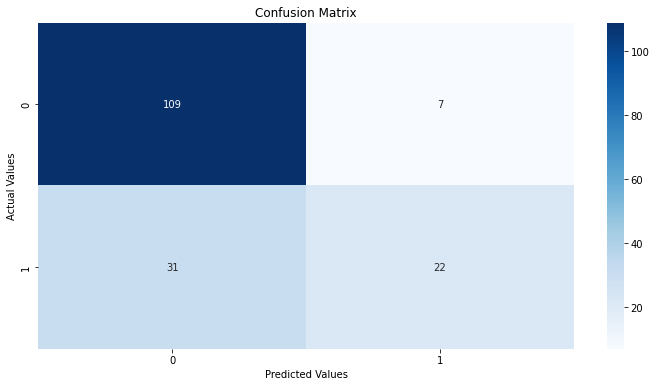

In [ ]:
#visualize the confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

Using Naive Bayes

In [ ]:
#train model using Naives Bayes
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
#evaluate model on training set - getting accuracy of model for training set
print(gnb_model.score(x_train, y_train))

0.7801980198019802


In [ ]:
#predict test results
y_pred1 = gnb_model.predict(x_test)
y_pred1

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
#evaluate model using test set
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred1))
print("Accuracy : ", accuracy_score(y_test, y_pred1))
print("Precision : ", precision_score(y_test, y_pred1))
print("Total Recall : ", recall_score(y_test, y_pred1))
print("F1 Score : ", f1_score(y_test, y_pred1))

Confusion Matrix : 
 [[99 17]
 [21 32]]
Accuracy :  0.7751479289940828
Precision :  0.6530612244897959
Total Recall :  0.6037735849056604
F1 Score :  0.6274509803921567


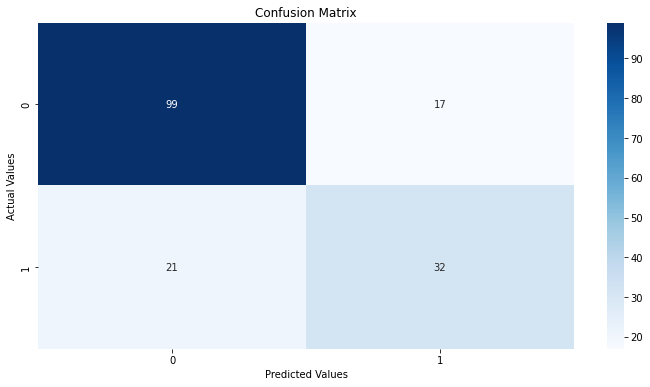

In [ ]:
#show confusion matrix
cm=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

Using Random Forest 

In [ ]:
#train model using Random Forest
from sklearn.ensemble import RandomForestClassifier

clf_model = RandomForestClassifier()
clf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
#evaluate model on training set - getting accuracy of model for training set
print(clf_model.score(x_train, y_train))

1.0


In [ ]:
#predict test results
y_pred2 = clf_model.predict(x_test)
y_pred2

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
#evaluate model using test set
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred2))
print("Accuracy : ", accuracy_score(y_test, y_pred2))
print("Precision : ", precision_score(y_test, y_pred2))
print("Total Recall : ", recall_score(y_test, y_pred2))
print("F1 Score : ", f1_score(y_test, y_pred2))

Confusion Matrix : 
 [[112   4]
 [ 35  18]]
Accuracy :  0.7692307692307693
Precision :  0.8181818181818182
Total Recall :  0.33962264150943394
F1 Score :  0.48


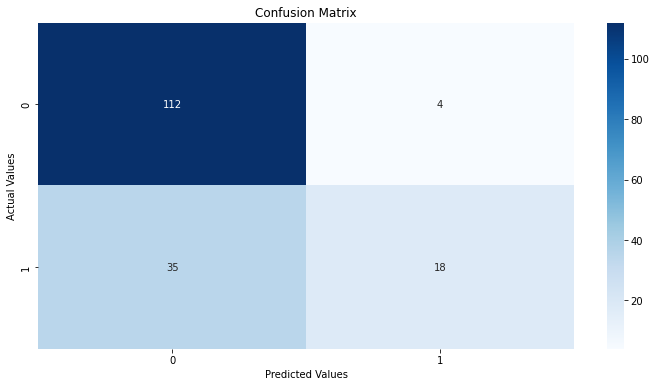

In [ ]:
#show confusion matrix
cm=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

Train Using Voting Classifier


In [ ]:
from sklearn.ensemble import VotingClassifier
# Create the voting classifier
voting_classifier_model = VotingClassifier(
    estimators=[('lr', LR_model), ('nb', gnb_model), ('rf', clf_model)],
    voting='soft'     #Each base model makes a prediction based on the predicted probabilities for each class
)                     #The final prediction is the class with the highest average predicted probability

In [ ]:
# Train the classifier on the training data
voting_classifier_model.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=0)),
                             ('nb', GaussianNB()),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [ ]:
#evaluate model on training set - getting accuracy of model for training set
print(voting_classifier_model.score(x_train, y_train))

0.8633663366336634


In [ ]:
# Test the classifier on the test data
voting_classifier_model.score(x_test, y_test)

0.8106508875739645

In [ ]:
#predict test results
y_pred3 = voting_classifier_model.predict(x_test)
y_pred3

array([0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.])

In [ ]:
vc_probs = voting_classifier_model.predict_proba(x_test)

In [ ]:
#evaluate model using test set
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred3))
print("Accuracy : ", accuracy_score(y_test, y_pred3))
print("Precision : ", precision_score(y_test, y_pred3))
print("Total Recall : ", recall_score(y_test, y_pred3))
print("F1 Score : ", f1_score(y_test, y_pred1))

Confusion Matrix : 
 [[109   7]
 [ 25  28]]
Accuracy :  0.8106508875739645
Precision :  0.8
Total Recall :  0.5283018867924528
F1 Score :  0.6274509803921567


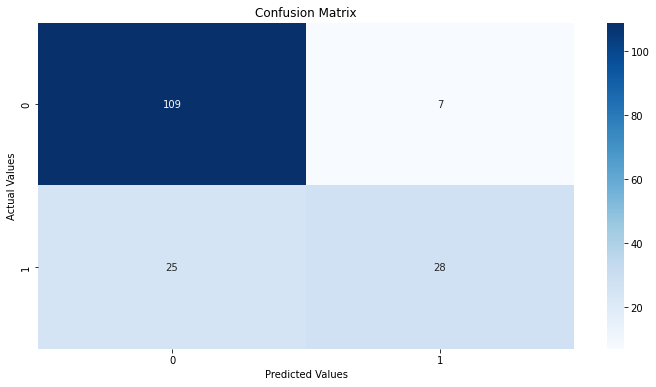

In [ ]:
#show confusion matrix
cm=confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')